In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('./titanic.csv',index=False)

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 보간작업

In [11]:
titanic['age']=titanic['age'].fillna(titanic['age'].median()) 
titanic['age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 88, dtype: int64

In [10]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
titanic['embarked']=titanic['embarked'].fillna('S')
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [13]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [14]:
titanic['embark_town']=titanic['embark_town'].fillna('Southampton')
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [15]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [16]:
titanic['deck']=titanic['deck'].fillna('C')
titanic['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [18]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# 정보탐색

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

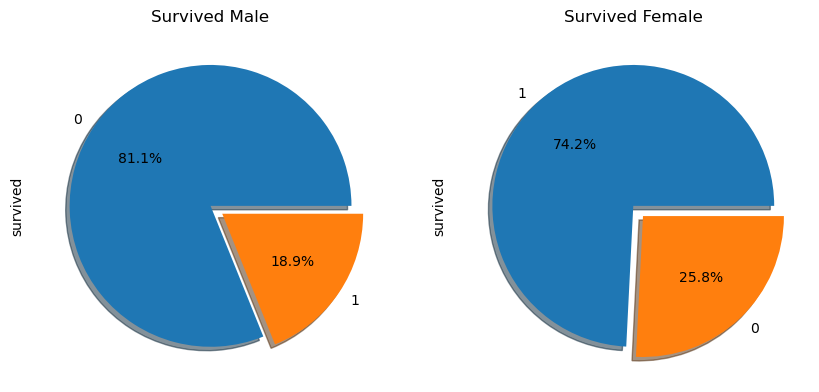

In [28]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize=(10,5))

titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)

titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow=True)

ax[0].set_title('Survived Male')
ax[1].set_title('Survived Female')

plt.show()


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


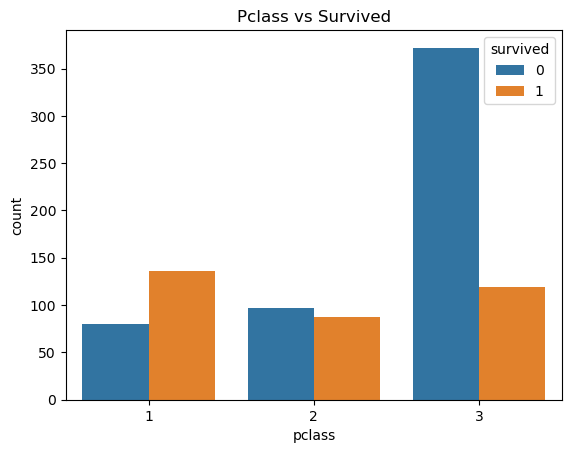

In [29]:
sns.countplot('pclass',hue='survived',data=titanic)
plt.title('Pclass vs Survived')

plt.show()

# 데이터 모델링

In [33]:
titanic_corr=titanic.corr(method='pearson')
print(titanic_corr)

titanic_corr.to_csv('./titanic_corr.csv',index=False)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
age        -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
sibsp      -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.247704 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.247704  0.171647  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


ValueError: object arrays are not supported

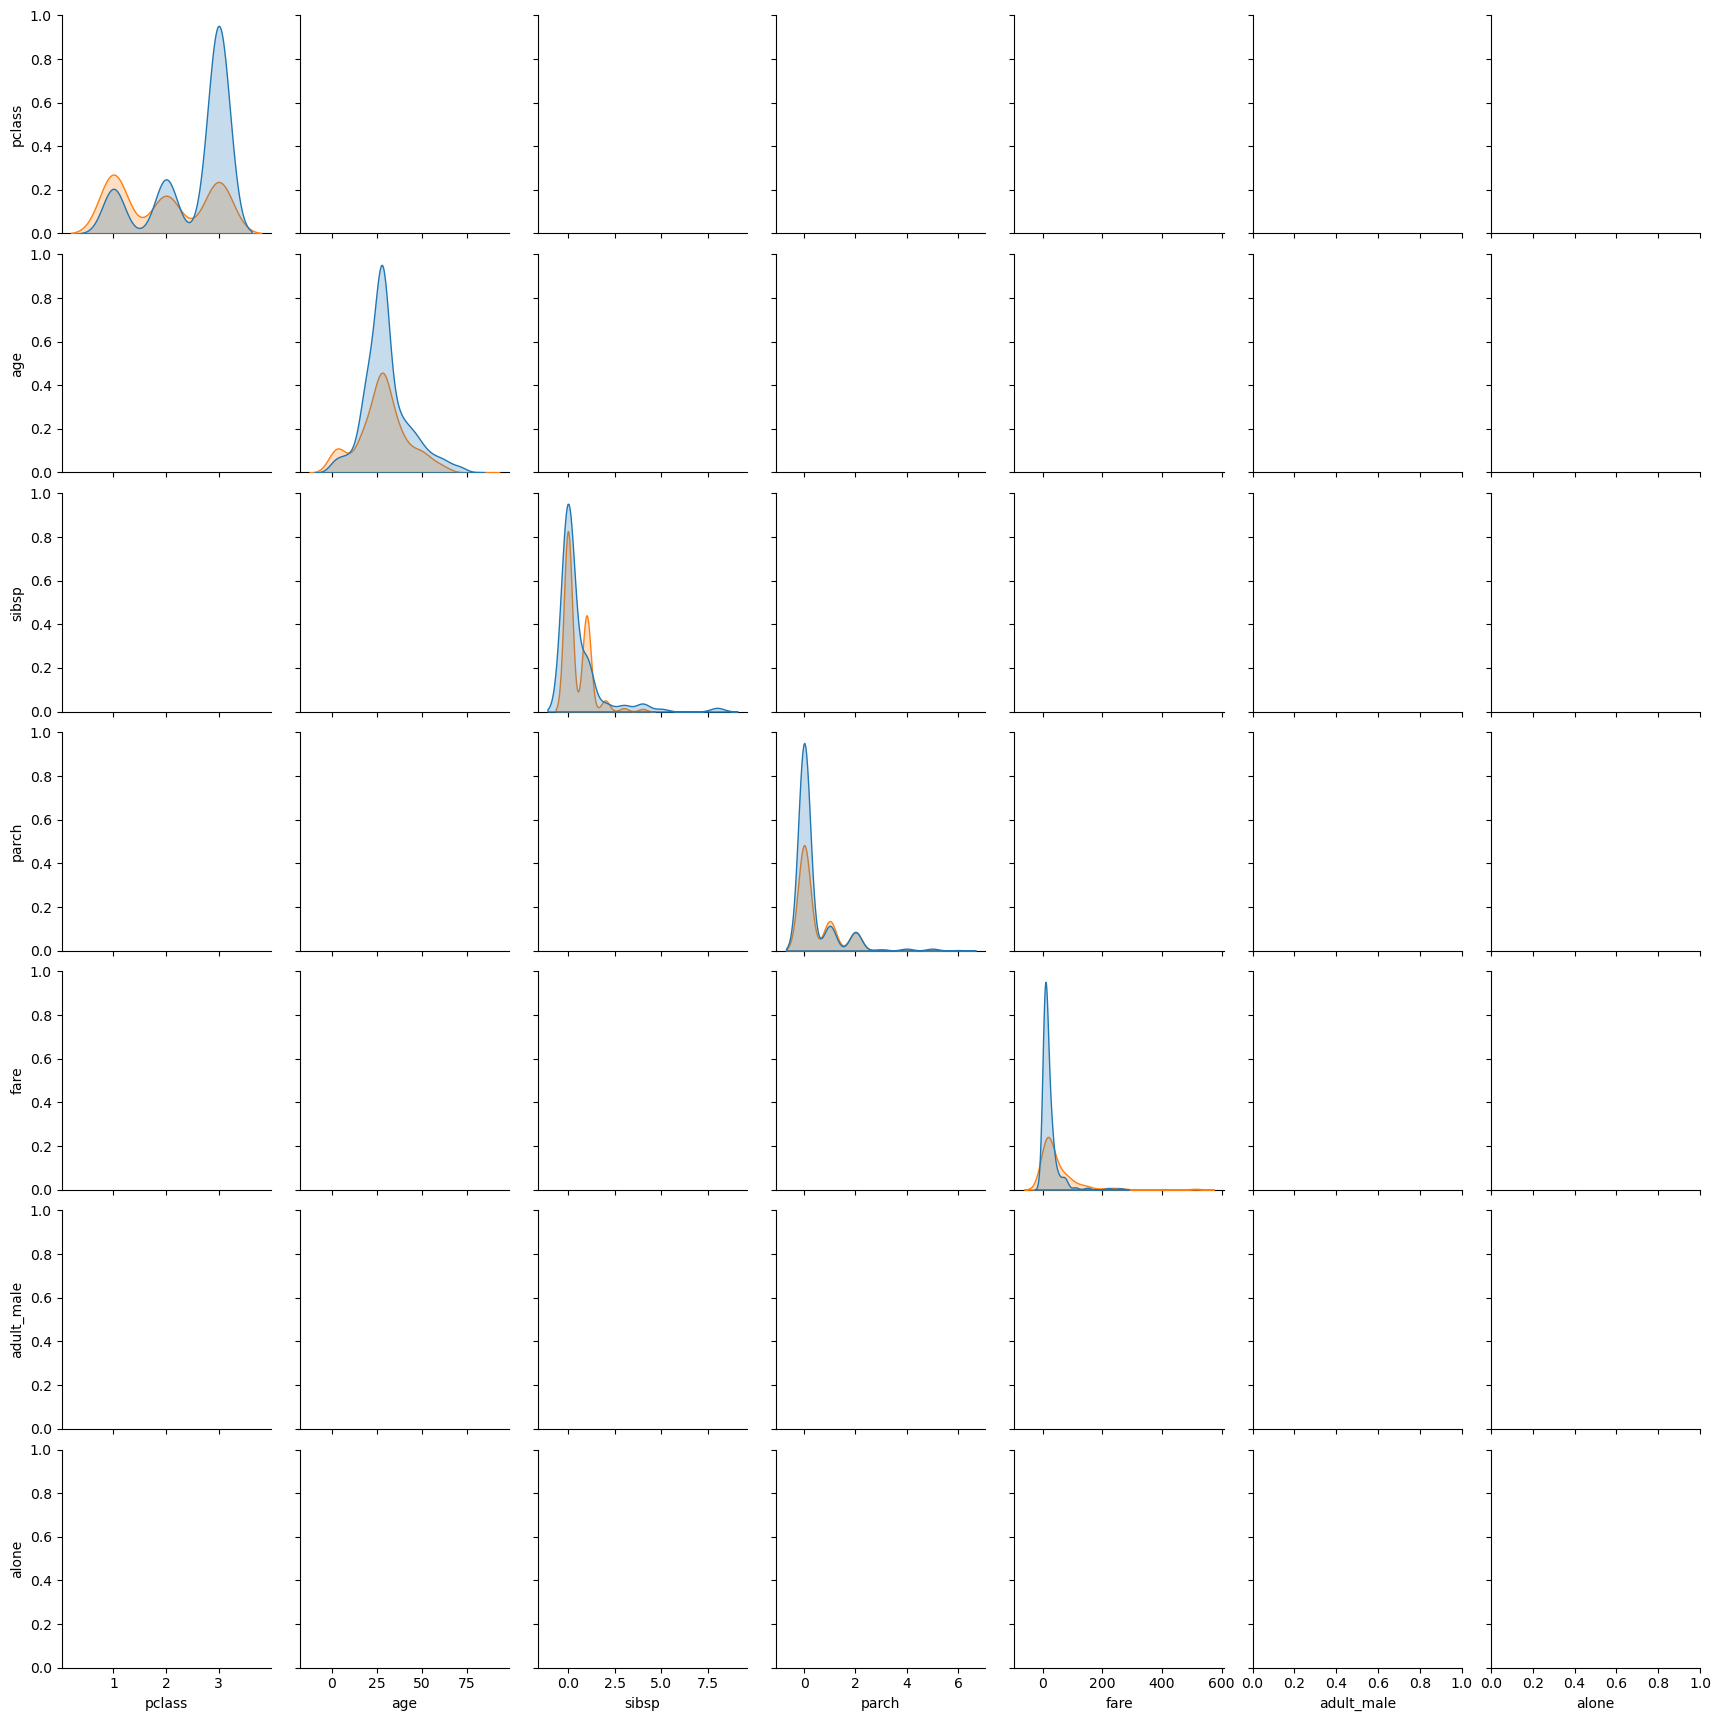

In [35]:
sns.pairplot(titanic, hue = 'survived')
plt.show()

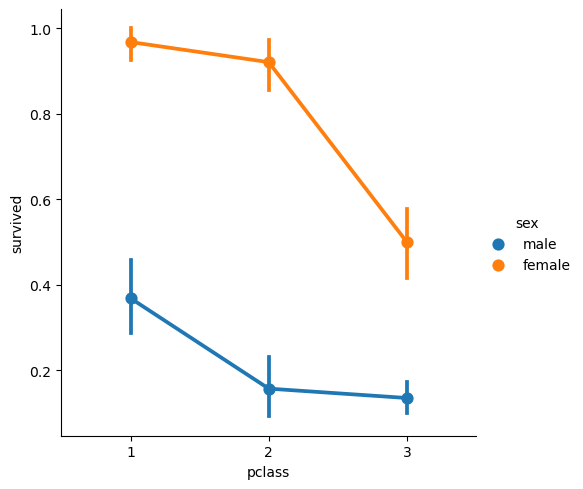

In [36]:
sns.catplot(x='pclass',y='survived',hue='sex',data=titanic,kind='point')
plt.show()

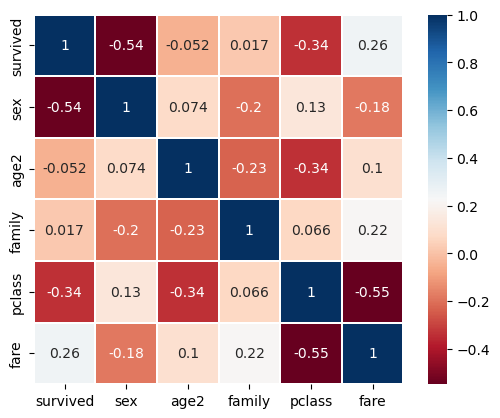

In [37]:
def category_age(x):
    if x<10 :
        return 0
    elif x<20 : 
        return 1
    elif x<30 : 
        return 2
    elif x<40 : 
        return 3
    elif x<50 : 
        return 4
    elif x<60 : 
        return 5
    elif x<70 : 
        return 6
    else:
        return 7

titanic['age2']=titanic['age'].apply(category_age)
titanic['sex']=titanic['sex'].map({'male':1,'female':0})
titanic['family']=titanic['sibsp']+titanic['parch']+1
titanic.to_csv('./titanic3',index=False)
heatmap_data=titanic[['survived','sex','age2','family','pclass','fare']]
colormap=plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":10})
plt.show()